In [87]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:\\Users\\piak6\\Downloads\\wine.csv") 
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [89]:
# 컬럼명 확인
df.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

Text(0.5, 1.0, 'Label')

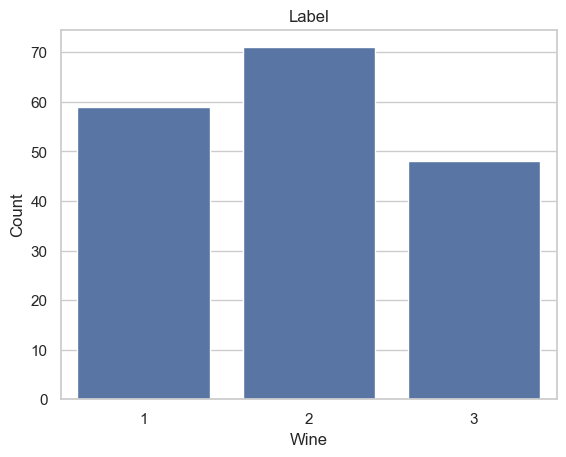

In [90]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Wine")
plt.xlabel("Wine")
plt.ylabel("Count")
plt.title("Label")

In [91]:
# 레이블 갯수 확인 (숫자)
df['Wine'].value_counts()

Wine
2    71
1    59
3    48
Name: count, dtype: int64

In [92]:
# 결측치 확인
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [93]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

C:\Users\piak6\AppData\Local\Temp\ipykernel_10416\2490602734.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Alcohol'], kde = True, hist = False, ax=ax1)
C:\Users\piak6\AppData\Local\Temp\ipykernel_10416\2490602734.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Malic.ac

<Axes: xlabel='Malic.acid', ylabel='Density'>

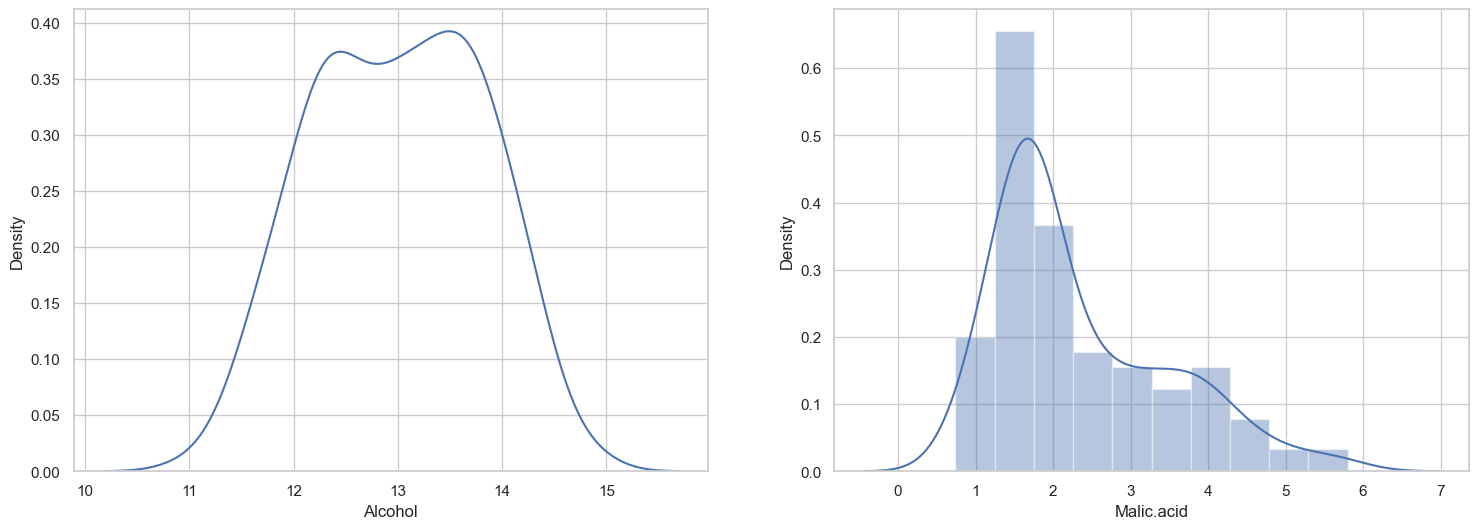

In [94]:
# 컬럼별 히스토그램 확인

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['Alcohol'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['Malic.acid'], ax=ax2)

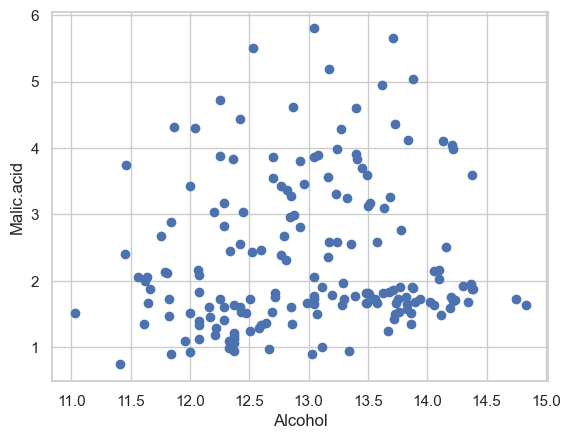

In [95]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['Alcohol'], df['Malic.acid'])
plt.xlabel('Alcohol')
plt.ylabel('Malic.acid')

plt.show()

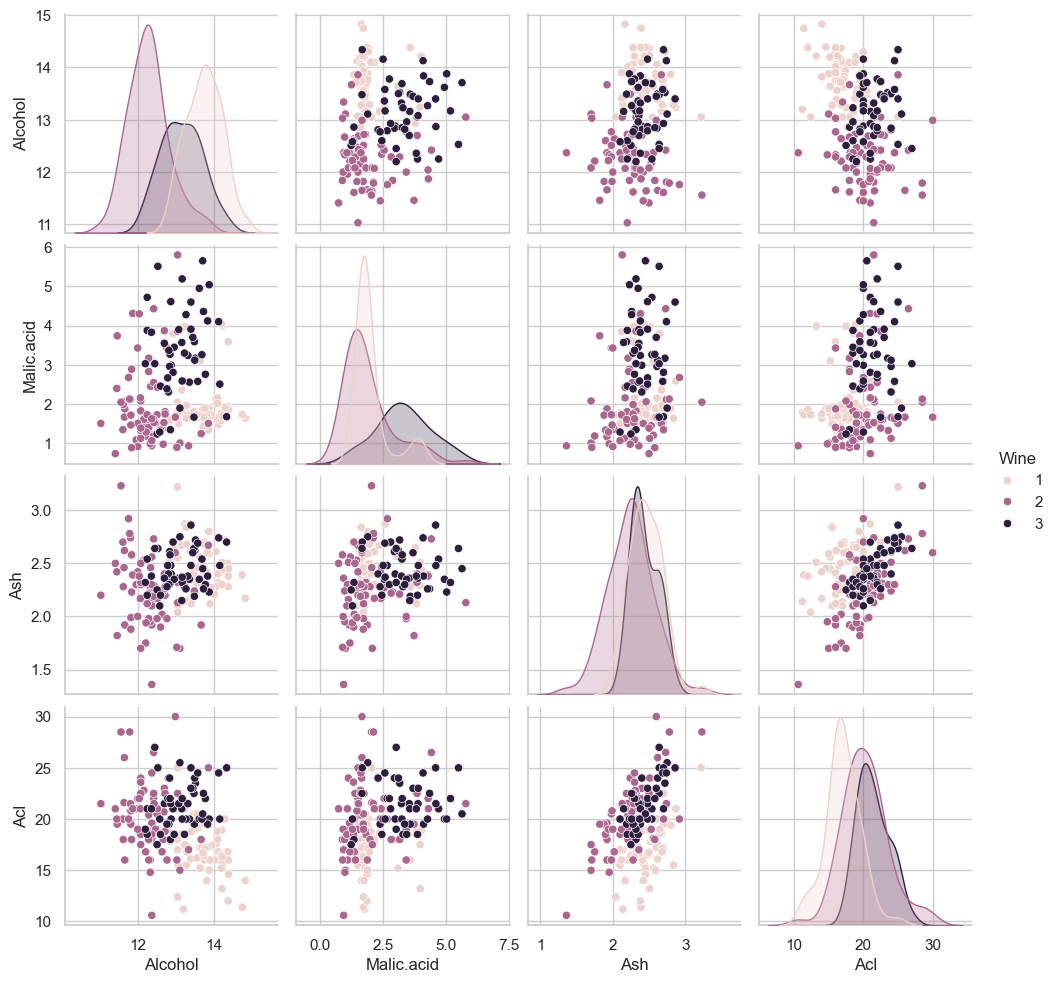

In [96]:
# pairplot를 사용해 각 상관관계 살펴보기

sns.pairplot(df,
             vars=['Alcohol', 'Malic.acid', 'Ash', 'Acl'],
            hue ='Wine')
plt.show()

C:\Users\piak6\AppData\Local\Temp\ipykernel_10416\843742235.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Alcohol", data=df, palette="Set3")


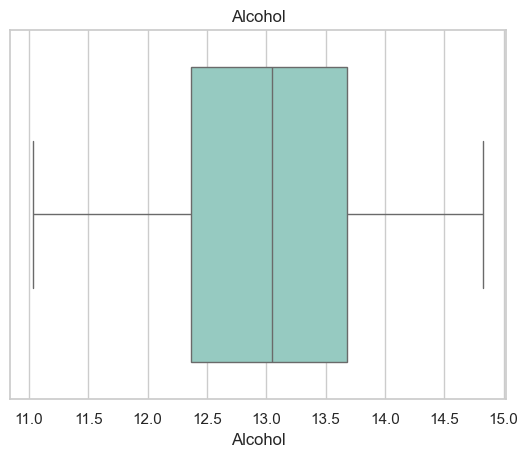

In [97]:
# 특정 칼럼의 범위 확인 및 outlier 확인

sns.set_theme(style="whitegrid")
sns.boxplot(x="Alcohol", data=df, palette="Set3")
plt.title("Alcohol")
plt.show()

C:\Users\piak6\AppData\Local\Temp\ipykernel_10416\2498552643.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


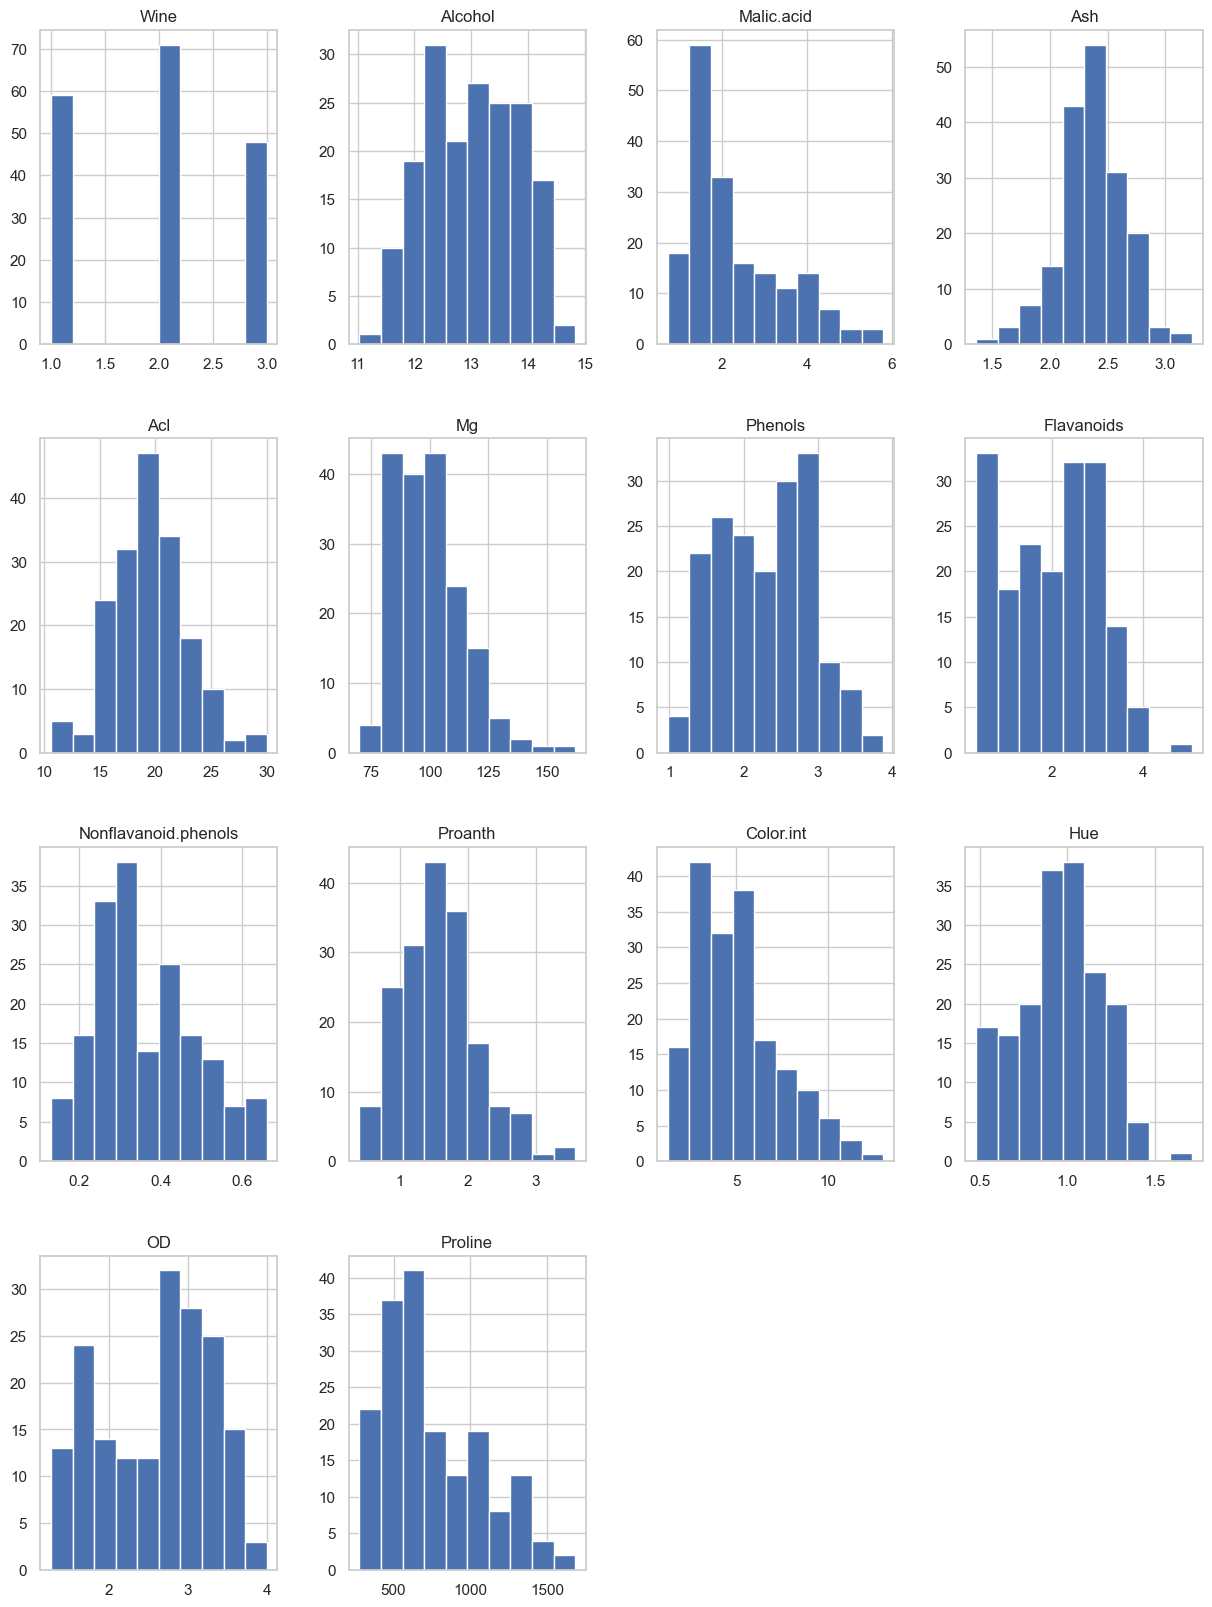

In [98]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [99]:
X=df.drop('Wine',axis=1)
X.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [100]:
y=df['Wine']
y.value_counts()

Wine
2    71
1    59
3    48
Name: count, dtype: int64

In [101]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Wine, dtype: int64

In [102]:
#원-핫 인코딩
Y = pd.get_dummies(y).values

In [103]:
#딥러닝 입력을 위해 Numpy로 변환
X = X.values

In [104]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [105]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

In [106]:
Y

# 일반적으로 원-핫 인코딩은 0과 1의 숫자 값을 사용하지만, 
# 특정 상황이나 설정에 따라 불리언 값(True/False)으로 표현될 수 있음.

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ T

In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

#손실함수

#Binary Crossentropy

#이 손실 함수는 이진 분류 문제(binary classification)에 사용됩니다. 
#여기서 모델은 단 두 개의 클래스 중 하나를 예측해야 합니다. 
#보통 시그모이드 활성화 함수(sigmoid activation function)를 출력 계층에 사용합니다. 
#이 함수는 0과 1 사이의 값을 반환하여, 각 클래스에 속할 확률을 나타냅니다.

#Categorical Crossentropy

#다중 클래스 분류 문제(multi-class classification)에 사용됩니다. 
#모델은 두 개 이상의 클래스 중 하나를 예측해야 합니다. 
#소프트맥스 활성화 함수(softmax activation function)가 일반적으로 사용됩니다. 
#이 함수는 모든 클래스에 대해 확률 분포를 반환하여, 각 클래스에 속할 확률을 나타냅니다.

In [110]:
import tensorflow as tf
tf.keras.backend.clear_session()

# 모델 재정의 - 출력 레이어의 유닛 수를 3으로 변경
model = Sequential()
model.add(Dense(10, input_shape=(13,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax'))  

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# 모델 학습
model_history = model.fit(x=X_train, y=y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.18 KB)

 Trainable params: 303 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 266ms/step - accuracy: 0.3204 - loss: 77.7920 - val_accuracy: 0.1667 - val_loss: 89.0141
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3304 - loss: 65.9970 - val_accuracy: 0.1667 - val_loss: 81.3544
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3082 - loss: 65.1207 - val_accuracy: 0.1667 - val_loss: 74.0786
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2600 - loss: 63.0362 - val_accuracy: 0.1667 - val_loss: 67.3649
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.3130 - loss: 52.3902 - val_accuracy: 0.1667 - val_loss: 61.2365
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.2865 - loss: 47.6761 - val_accuracy: 0.1667 - val_loss: 55.3852
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2943 - loss: 45.6888 - val_accuracy: 0.1667 - val_loss: 49.7766
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3004 - loss: 36.2512 - val_accuracy: 0.1667 - v

In [111]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4350 - loss: 3.0839 - val_accuracy: 0.4722 - val_loss: 3.1046
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3883 - loss: 2.5201 - val_accuracy: 0.4444 - val_loss: 2.5999
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3270 - loss: 1.9424 - val_accuracy: 0.4444 - val_loss: 2.1170
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3731 - loss: 1.6710 - val_accuracy: 0.4444 - val_loss: 1.6397
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3600 - loss: 1.3783 - val_accuracy: 0.4444 - val_loss: 1.2264
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4171 - loss: 1.0907 - val_accuracy: 0.6111 - val_loss: 0.9869
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5685 - loss: 0.9512 - val_accuracy: 0.7500 - val_loss: 0.8789
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6351 - loss: 0.8761 - val_accuracy: 0.7222 - val_loss: 0.6832


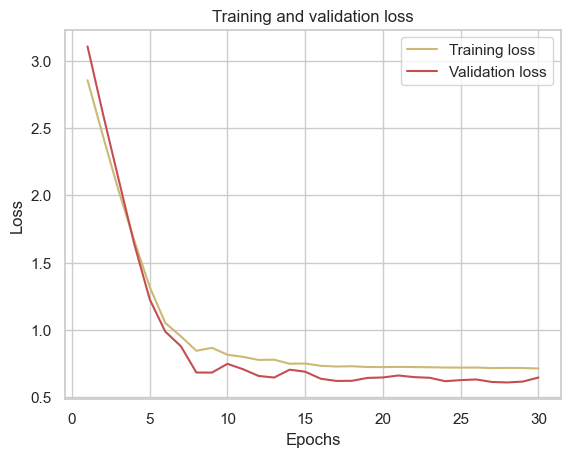

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

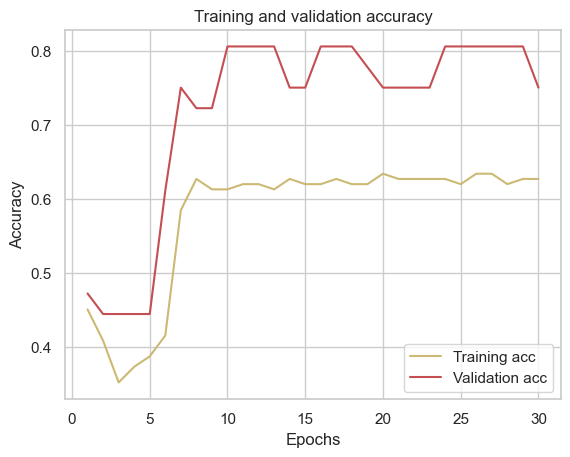

In [116]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [118]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.67      1.00      0.80        16
           2       0.00      0.00      0.00         6

    accuracy                           0.75        36
   macro avg       0.53      0.60      0.55        36
weighted avg       0.65      0.75      0.68        36

[[11  3  0]
 [ 0 16  0]
 [ 1  5  0]]


C:\Users\piak6\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\piak6\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\piak6\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
